# Combine all to SDSS r band 

Mostly based on `AC_combined_LC` 

* combining :
  * SDSS(r),  
  * PTF(g,R) -- SDSS(g-i) --> SDSS(r,synth) 
  * PS1(g,r,i) -- SDSS(g-i) --> SDSS(r,synth)
  * CRTS(V) -- SDSS(g-i) --> SDSS(r,synth)
  
using offsets from `AC_SDSS-PS1_offsets.ipynb`,   `AC_SDSS-PTF_offsets.ipynb`, derived with SDSS standard stars cross matched to the relevant surveys . 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

Go over each light curve from the outer join : 
    pick the PS1 gri,  PTF gR,  CRTS V , and shift to SDSS r 

Compare the aggregate colors from means and medians to DB  QSO values:  

In [2]:
summary = Table.read('../code/summary_combined_lc_info.txt', format='ascii')

File = '../../CRTS_PROJECT/catalogs_SDSS/DB_QSO_S82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
sdss_dbqso = Table.read(File, format='ascii', names = colnames)
summary['dbID'] = [int(x[:-4]) for x in summary['lcname']]
summ = join(summary, sdss_dbqso, keys='dbID')

In [5]:
len(sdss_dbqso)

9258

u 86
g 27
r 18
i 18
z 17


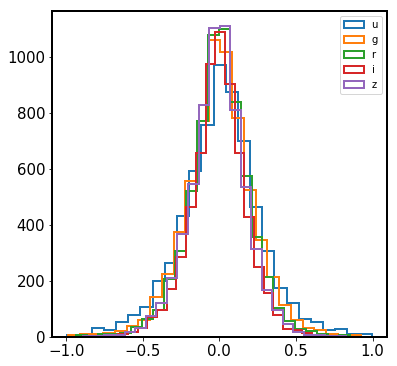

In [29]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(6,6))
for f in 'ugriz':
    d = summ['SDSS_median'+f+'mag']-summ[f]
    m = abs(d)>1
    print(f,np.sum(m))
    #print(summ[m][['SDSS_median'+f+'mag', f]])
    ax.hist(d[~m], histtype='step', lw=2, label = f, bins=25)

ax.legend()

So the question is : how were DB_QSO magnitudes calculated ? Why certain QSO for which there is a light curve have no DB_QSO  colors? 

In DB_QSO, these are "SDSS BEST x band PSF magnitudes", and a footnote in http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html  says   "SDSS photometric measurements are asinh magnitudes (Lupton, Gunn, 
    and Szalay 1999, AJ, 118, 1406) and are normalized (to ~3% accuracy) 
    to the AB-magnitude system (Oke and Gunn 1983, ApJ, 266, 713). Note 
    that the ugriz magnitudes are not corrected for Galactic absorption. 
    A "0.000" indicates that the value couldn't be retrieved from 
    the SDSS database. "
    
This means that perhaps it's better if I just use the median light curve value for SDSS g-i color ... 

Compute just the median SDSS  colors for combined light curves... After all I don't really need PTF, PS1 or CRTS median magnitudes or errors at this stage...

May need them later  - then can easily expand this code using the rest of `AC_summary ...`

In [33]:
#Initialize storage arrays
from itertools import product

summary = {}
input_dir = '../dp2/real_outer_join/'
lcs = os.listdir(input_dir)

summary['lcname'] = lcs
for a,b,c in product(['median'], [f for f in 'ugriz'], ['mag', 'err']):
    summary[a+b+c] = np.zeros_like(lcs, dtype=float)
for a,b in product([f for f in 'ugriz'],['N']):
    summary[a+b] =np.zeros_like(lcs, dtype=float)


In [35]:
for i in range(len(lcs)):
    if i % 100 == 0  : 
        print(i)
    fname = input_dir+lcs[i]
    lc = Table.read(fname, format='ascii')
    m1 = lc['survey'] == 'sdss'
    for f in 'ugriz' :
        m2 = lc['filter'] == f
        m = m1*m2 
        summary['median'+f+'err'][i] = np.median(lc['magerr'][m])
        summary['median'+f+'mag'][i] = np.median(lc['mag'][m])
        summary[f+'N'][i] = len(lc['mag'][m])



0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270
2280
2290
2300
2310
2320
2330
2340
2350
2360
2370
2380
2390
2400
2410
2420
2430
2440
2450
2460
2470
2480
2490
2500
2510
2520
2530
2540
2550
2560
2570
25

In [36]:
summary_t = Table(summary)
summary_t.write('real_outer_join_summary_SDSS.txt', format='ascii',
              overwrite=True)

In [2]:
from astropy.table import Table
summary_t = Table.read('real_outer_join_summary_SDSS.txt', format='ascii')

In [3]:
summary_t

lcname,medianumag,medianuerr,mediangmag,mediangerr,medianrmag,medianrerr,medianimag,medianierr,medianzmag,medianzerr,uN,gN,rN,iN,zN
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1441903.txt,20.506500000000003,0.073,20.207,0.028,20.06,0.028,19.7965,0.031,19.7545,0.093,56.0,55.0,55.0,56.0,54.0
728791.txt,20.0335,0.0575,19.7765,0.02,19.593,0.019,19.315,0.021,19.3005,0.07050000000000001,52.0,52.0,51.0,53.0,52.0
908716.txt,19.265,0.033,18.951999999999998,0.014,18.679,0.013,18.6005,0.015,18.572,0.036,56.0,58.0,59.0,56.0,59.0
100520.txt,18.945,0.029,18.7245,0.015,18.5345,0.014,18.438,0.017,18.250500000000002,0.031,37.0,34.0,36.0,37.0,36.0
3759755.txt,20.3925,0.079,20.145,0.023,20.1095,0.03,19.7745,0.034,19.71,0.098,68.0,69.0,70.0,70.0,71.0
505877.txt,19.465,0.0475,19.322,0.019,18.988500000000002,0.0215,18.820999999999998,0.0235,18.4535,0.0505,6.0,7.0,6.0,6.0,6.0
748703.txt,25.374499999999998,1.1665,21.765,0.075,20.143,0.0305,19.836,0.033,19.794,0.091,52.0,57.0,56.0,57.0,56.0
2565329.txt,19.0815,0.0315,18.953,0.017,18.5645,0.013,18.712,0.016,18.85,0.048,70.0,79.0,82.0,83.0,80.0
248292.txt,20.439999999999998,0.075,20.478,0.029,20.484,0.037,20.307,0.0485,20.2175,0.129,52.0,54.0,55.0,56.0,56.0


In [47]:
# Read in offsets...
off = Table.read('../code/Offsets_to_SDSSr_combined.txt', format='ascii')

In [49]:
#off

In [57]:
# the input combined  LCs
input_dir = '../dp2/real_outer_join/'
output_dir = '../dp2/real_combined_r/'

lcnames = os.listdir(input_dir)

j = 0 
for lcname in lcnames  :
    if j % 100 == 0 : 
        print(j)
    # read in the light curve 
        lc = Table.read(input_dir+lcname, format='ascii')

    # extract the color info about 
    # this QSO from the survey 
    row = summary_t['lcname'] == lcname
    sdss_gi = summary_t[row]['mediangmag'][0] -summary_t[row]['medianimag'][0]
    
    # take the 'true' SDSS r...
    mask = (lc['survey'] == 'sdss') & (lc['filter'] == 'r')
    lc2 = lc[mask].copy()

    lcs = {}
    for i in range(len(off)):
        
        # only if in for that quasar in  real_outer_join/ of SDSS to all 
        # there is any data from that survey ... 
        if np.in1d(off['originSurvey'][i],lc['survey'])[0] : 
            
            # select rows that have  the desired survey and bands 
            # eg. PS1 gri 
            m = (lc['survey'] == off['originSurvey'][i])  & \
                (lc['filter'] == off['codeBand'][i])
        
            # make a copy 
            lcs[i]  = lc[m].copy()

            # apply transformation 
            lcs[i]['mag'] = lcs[i]['mag'] - off['B0'][i] - off['B1'][i] * sdss_gi

            # stack 
            lc2 = vstack([lc2, lcs[i]])

    # rename columns to prevent possible confusion : 
    # all was transformed to the target SDSS r band 
    # and this only indicates what was the 
    # origin Band and the origin Survey ... 
    lc2.rename_column('filter', 'originBand')
    lc2.rename_column('survey', 'originSurvey')  
    
    # remove obviously bad points 
    m1 = lc2['mag'] < 0 
    m2 = lc2['mjd'] < 10000
    m = m1 | m2 
    lc2.remove_rows(m)
    
    # remove 3 sigma outliers ... 
    #m = np.abs(np.mean(lc2['mag']) - lc2['mag']) > 3 * np.std(lc2['mag'])
    #lc2.remove_rows(m)
    #fig,ax = plt.subplots(1,1)
    #ax.scatter(lc2['mjd'], lc2['mag'])
    #ax.scatter(lc2['mjd'][m], lc2['mag'][m])

    lc2.write(output_dir+lcname, format='ascii', overwrite=True)
    
    j += 1 

0


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


100
200
300
400


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


500
600
700
800
900
1000


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


1100
1200
1300
1400
1500
1600


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


1700
1800
1900
2000
2100
2200
2300


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


2400
2500
2600
2700
2800
2900
3000


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


5500
5600
5700
5800
5900
6000
6100


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


6200
6300
6400
6500


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


6600
6700
6800
6900
7000
7100


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


7200


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


7300
7400
7500
7600
7700
7800
7900
8000
8100
8200


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


8300
8400
8500
8600
8700
8800
8900
9000
9100
9200


In [56]:
np.in1d(off['originSurvey'][2],lc['survey'] )[0]

True